In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Alinemm/DMIE-2020.1/master/DesafioA-cursos-prouni-pb-jpa.csv')

In [2]:
df.head()

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,PB,Joao Pessoa,Centro Universitário de João Pessoa - Unipê - ...,CAMPUS UNIPÊ - Água Fria,Administração,Bacharelado,Matutino,529.00,5.0,4.0,NaN,NaN,609.94,607.2,NaN,NaN
1,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 01 - Miramar,Administração,Bacharelado,Curso a Distância,298.00,1.0,NaN,NaN,NaN,582.64,NaN,NaN,NaN
2,PB,Joao Pessoa,Centro Universitário Internacional - Uninter -...,PAP JOÃO PESSOA 02 - Expedicionários,Administração,Bacharelado,Curso a Distância,298.00,NaN,NaN,1.0,NaN,NaN,NaN,547.8,NaN
3,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Administração,Bacharelado,Noturno,864.67,NaN,NaN,NaN,100.0,NaN,NaN,450.0,NaN
4,PB,Joao Pessoa,Faculdade Devry João Pessoa - DVJP,CAMPUS SEDE - Miramar,Administração,Bacharelado,Matutino,864.67,NaN,NaN,NaN,100.0,NaN,NaN,450.0,NaN


In [3]:
#valor média das instituições da PB
df.mensalidade.mean()

663.3612777777778

In [4]:
#valor mediana das instituições da PB
df.mensalidade.median()

492.39

In [5]:
#desvio padrao das instituições da PB
df.mensalidade.std()

757.1894344917151

In [6]:
#moda das instituições da PB
df.mensalidade.mode()

0    256.86
dtype: float64

---------

Desafio B

In [7]:
df.columns

Index(['uf_busca', 'cidade_busca', 'universidade_nome', 'campus_nome', 'nome',
       'grau', 'turno', 'mensalidade', 'bolsa_integral_cotas',
       'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla',
       'nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla',
       'nota_parcial_cotas'],
      dtype='object')

In [8]:
#A
type(df)

pandas.core.frame.DataFrame

In [9]:
#B
df.shape

(360, 16)

In [10]:
#C
df.universidade_nome.nunique()

29

In [11]:
#D
df.nome.nunique()

82

In [12]:
#E
df.universidade_nome[(df.nome=='Ciência da Computação') | (df.nome=='Ciências da Computação')].unique()

array(['Centro Universitário de João Pessoa - Unipê - UNIPÊ',
       'Instituto Paraibano de Ensino Renovado - INPER',
       'Faculdade Devry João Pessoa - DVJP',
       'Faculdade Internacional da Paraíba - FPB'], dtype=object)

In [13]:
#F
df.mensalidade[(df.nome=='Ciência da Computação') | (df.nome=='Ciências da Computação')].mean()

651.772



---



Desafio C

In [14]:
#Desafio C - Detecção de outliers
df.isna().mean()

uf_busca                0.000000
cidade_busca            0.000000
universidade_nome       0.000000
campus_nome             0.000000
nome                    0.000000
grau                    0.000000
turno                   0.000000
mensalidade             0.000000
bolsa_integral_cotas    0.177778
bolsa_integral_ampla    0.413889
bolsa_parcial_cotas     0.852778
bolsa_parcial_ampla     0.852778
nota_integral_ampla     0.177778
nota_integral_cotas     0.416667
nota_parcial_ampla      0.725000
nota_parcial_cotas      0.980556
dtype: float64

In [15]:
#Estratégia 1
print("média da mensalidade: ",df.mensalidade.mean())
print("mediana da mensalidade: ",df.mensalidade.median())

print("\nmédia da nota_integral_ampla: ",df.nota_integral_ampla.mean())
print("mediana da nota_integral_ampla: ",df.nota_integral_ampla.median())

print("\nmédia da nota_integral_cotas: ",df.nota_integral_cotas.mean())
print("mediana da nota_integral_cotas: ",df.nota_integral_cotas.median())

média da mensalidade:  663.3612777777778
mediana da mensalidade:  492.39

média da nota_integral_ampla:  593.8917567567569
mediana da nota_integral_ampla:  591.51

média da nota_integral_cotas:  583.7900952380957
mediana da nota_integral_cotas:  579.78


In [16]:
#Estratégia 2
print("desvio padrão da mensalidade: ",df.mensalidade.std())
print("\ndesvio padrão da nota_integral_ampla: ",df.nota_integral_ampla.std())
print("\ndesvio padrão da nota_integral_cotas: ",df.nota_integral_cotas.std())

desvio padrão da mensalidade:  757.1894344917151

desvio padrão da nota_integral_ampla:  39.80384881681868

desvio padrão da nota_integral_cotas:  38.52677856993148


In [0]:
#Estratégia 3
from scipy import stats
import numpy as np

df['zscore_mensalidade'] = np.abs(stats.zscore(df.mensalidade))
df['zscore_nota_integral_ampla'] = np.abs(stats.zscore(df.nota_integral_ampla))
df['zscore_nota_integral_cotas'] = np.abs(stats.zscore(df.nota_integral_cotas))

In [18]:
df.zscore_mensalidade[(df.zscore_mensalidade> 3) | (df.zscore_mensalidade <-3)].count()

3

In [19]:
df.zscore_nota_integral_ampla[(df.zscore_nota_integral_ampla> 3) | (df.zscore_nota_integral_ampla <-3)].count()

0

In [20]:
df.zscore_nota_integral_cotas[(df.zscore_nota_integral_cotas> 3) | (df.zscore_nota_integral_cotas <-3)].count()

0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


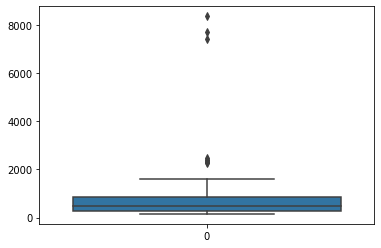

In [21]:
#Estratégia 4 - Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df.mensalidade)

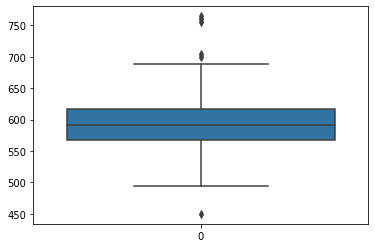

In [22]:
sns.boxplot(data=df.nota_integral_ampla)

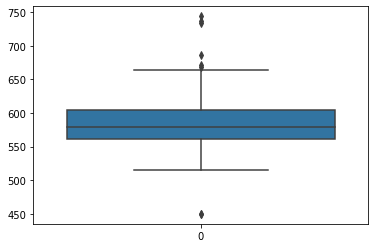

In [23]:
sns.boxplot(data=df.nota_integral_cotas)

Tratando os outliers

In [0]:
#Estratégia 1
df_semOutliers1 = df[(df.zscore_mensalidade<3) & (df.zscore_mensalidade> -3)]

In [0]:
#Estratégia 2
df_semOutliers2 =  df
df_semOutliers2.mensalidade = np.where((df_semOutliers2.zscore_mensalidade>3) | (df_semOutliers2.zscore_mensalidade<-3), 
                                       df_semOutliers2.mensalidade.mean(), 
                                       df_semOutliers2.mensalidade)


In [26]:
#Estratégia 3
df_semOutliers3 = df
df_semOutliers3 = df_semOutliers3[df_semOutliers3.mensalidade.between(df.mensalidade.quantile(.25), df.mensalidade.quantile(.75))]
print(df_semOutliers3.shape)
print(max(df_semOutliers3.mensalidade))

(183, 19)
839.79


In [27]:
print(df.shape)
print(max(df.mensalidade))


(360, 19)
2488.0




---



Desafio F

In [28]:
# Primeiro método - geração de histogramas
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (15,20))
ax = fig.gca()
hist = 

SyntaxError: ignored

In [0]:
#2 método - boxplot

fig = plt.figure(figsize=(10,10))
ax = fig.gca()

boxplot = 

In [0]:
#3 método - QQplot

import pylab
import scipy.stats as stats



In [0]:
#4 método - KS
from scipy.stats import kstest

kstest(    , 'norm')

# é normal?

In [0]:
#5 método - método de lilliefors
from statsmodels.stats.diagnostic import lilliefors



In [0]:
#6 método - Shapiro
from scipy.stats import shapiro


In [0]:
#7 método - teste de Kurtosis e Skewness
import scipy.stats as stats


---

# Desafio G - Normalização

In [0]:
from sklearn import preprocessing as preprocessing
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro
import matplotlib.pyplot as plt

In [42]:
df.columns

Index(['uf_busca', 'cidade_busca', 'universidade_nome', 'campus_nome', 'nome',
       'grau', 'turno', 'mensalidade', 'bolsa_integral_cotas',
       'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla',
       'nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla',
       'nota_parcial_cotas', 'zscore_mensalidade',
       'zscore_nota_integral_ampla', 'zscore_nota_integral_cotas'],
      dtype='object')

In [0]:
df_filtered = df[['nome', 'grau', 'turno', 'mensalidade', 'bolsa_integral_cotas',
       'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla',
       'nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla',
       'nota_parcial_cotas']]

In [44]:
df_filtered.iloc[:,3:11].head()

,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla
0,529.00,5.0,4.0,NaN,NaN,609.94,607.2,NaN
1,298.00,1.0,NaN,NaN,NaN,582.64,NaN,NaN
2,298.00,NaN,NaN,1.0,NaN,NaN,NaN,547.8
3,864.67,NaN,NaN,NaN,100.0,NaN,NaN,450.0
4,864.67,NaN,NaN,NaN,100.0,NaN,NaN,450.0


In [45]:
#inserir valores nos elementos que estão como NaN (as colunas numéricas de 3-11)
imputer = SimpleImputer(missing_values=np.nan,strategy='constant')
imputer = imputer.fit(df_filtered.iloc[:,3:12])
df_filtered.loc[:,3:12] = imputer.transform(df_filtered.iloc[:,3:12])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
df_filtered.iloc[:,3:12].head()

,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,529.00,5.0,4.0,0.0,0.0,609.94,607.2,0.0,0.0
1,298.00,1.0,0.0,0.0,0.0,582.64,0.0,0.0,0.0
2,298.00,0.0,0.0,1.0,0.0,0.00,0.0,547.8,0.0
3,864.67,0.0,0.0,0.0,100.0,0.00,0.0,450.0,0.0
4,864.67,0.0,0.0,0.0,100.0,0.00,0.0,450.0,0.0


In [0]:
#transformar dados qualitativos em numeros ordinais (as 3 primeiras colunas: 0-2)
#ordinal = preprocessing.OrdinalEncoder()
#ordinal = ordinal.fit(df_filtered.iloc[:,0:3])
#df_filtered.iloc[:,0:3] = ordinal.transform(df_filtered.iloc[:,0:3])

In [0]:
#df_filtered.iloc[:,0:3].head()

In [49]:
#teste de normalidade por Shapiro Wilk
for i in df_filtered.columns:
  try:
    print(i)
    print(shapiro(df_filtered[i]))
  except ValueError:
    a=1

nome
grau
turno
mensalidade
(0.8304218053817749, 3.4227286181372317e-19)
bolsa_integral_cotas
(0.788674533367157, 2.7675110597260575e-21)
bolsa_integral_ampla
(0.5292171239852905, 6.938716329514028e-30)
bolsa_parcial_cotas
(0.3784017562866211, 3.128063201251064e-33)
bolsa_parcial_ampla
(0.37752264738082886, 3.0045626423468053e-33)
nota_integral_ampla
(0.6085919141769409, 9.147388197176866e-28)
nota_integral_cotas
(0.6973150968551636, 5.9650659050992415e-25)
nota_parcial_ampla
(0.5988808870315552, 4.837833946013684e-28)
nota_parcial_cotas
(0.11971604824066162, 1.1026840036547415e-37)


Box-cox

In [52]:
#Transformação por box-cox
df_norm=df_filtered
bc = preprocessing.PowerTransformer(method='box-cox')
bc = bc.fit(df_filtered.iloc[:,3:12])
df_norm.loc[:,3:12] = bc.transform(df_filtered.iloc[:,3:12])

ValueError: ignored

Yeo-Johnson

In [53]:
#Transformação por yeo-johnson
df_norm=df_filtered
yj = preprocessing.PowerTransformer()
yj = yj.fit(df_filtered.iloc[:,3:12])
df_norm.loc[:,3:12] = yj.transform(df_filtered.iloc[:,3:12])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
#df_norm = df_filtered
#print(df_filtered.columns)
#for i in df_filtered.columns:
#  try:
#    min_max_scaler = preprocessing.Normalizer()
#    y = np.array(df_norm.loc[:,i]).reshape(-1,1)
#    x_scaled = min_max_scaler.fit_transform(y)
#    df_norm[i] = pd.DataFrame(y)
#  except ValueError:
#    print(i)

In [54]:
df_norm.head()

,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Administração,Bacharelado,Matutino,0.0,1.548918,1.343198,-0.415498,-0.413872,0.520637,0.865729,-0.615879,-0.140819
1,Administração,Bacharelado,Curso a Distância,0.0,-0.382596,-1.090431,-0.415498,-0.413872,0.420174,-1.182842,-0.615879,-0.140819
2,Administração,Bacharelado,Curso a Distância,0.0,-1.614657,-1.090431,2.406587,-0.413872,-2.131655,-1.182842,1.626902,-0.140819
3,Administração,Bacharelado,Noturno,0.0,-1.614657,-1.090431,-0.415498,2.490338,-2.131655,-1.182842,1.616464,-0.140819
4,Administração,Bacharelado,Matutino,0.0,-1.614657,-1.090431,-0.415498,2.490338,-2.131655,-1.182842,1.616464,-0.140819


In [0]:
#df_norm = df_filtered
#min_max_scaler = preprocessing.Normalizer()
#min_max_scaler = min_max_scaler.fit(df_filtered.iloc[:,3:12])
#df_norm.iloc[:,3:12] = min_max_scaler.transform(df_filtered.iloc[:,3:12])

In [56]:
#teste de normalidade por Shapiro Wilk
for i in df_norm.columns:
  try:
    print(i)
    print(shapiro(df_norm[i]))
  except ValueError:
    a=1

nome
grau
turno
mensalidade
(1.0, 1.0)
bolsa_integral_cotas
(0.9236639738082886, 1.3992833584539066e-12)
bolsa_integral_ampla
(0.833506166934967, 5.053690971665693e-19)
bolsa_parcial_cotas
(0.42214852571487427, 2.46622035574057e-32)
bolsa_parcial_ampla
(0.4271395802497864, 3.146073391010394e-32)
nota_integral_ampla
(0.5864133834838867, 2.1732085158906198e-28)
nota_integral_cotas
(0.6446195244789124, 1.0893809337388561e-26)
nota_parcial_ampla
(0.559363603591919, 4.079058233195188e-29)
nota_parcial_cotas
(0.11758589744567871, 1.0244728279979333e-37)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


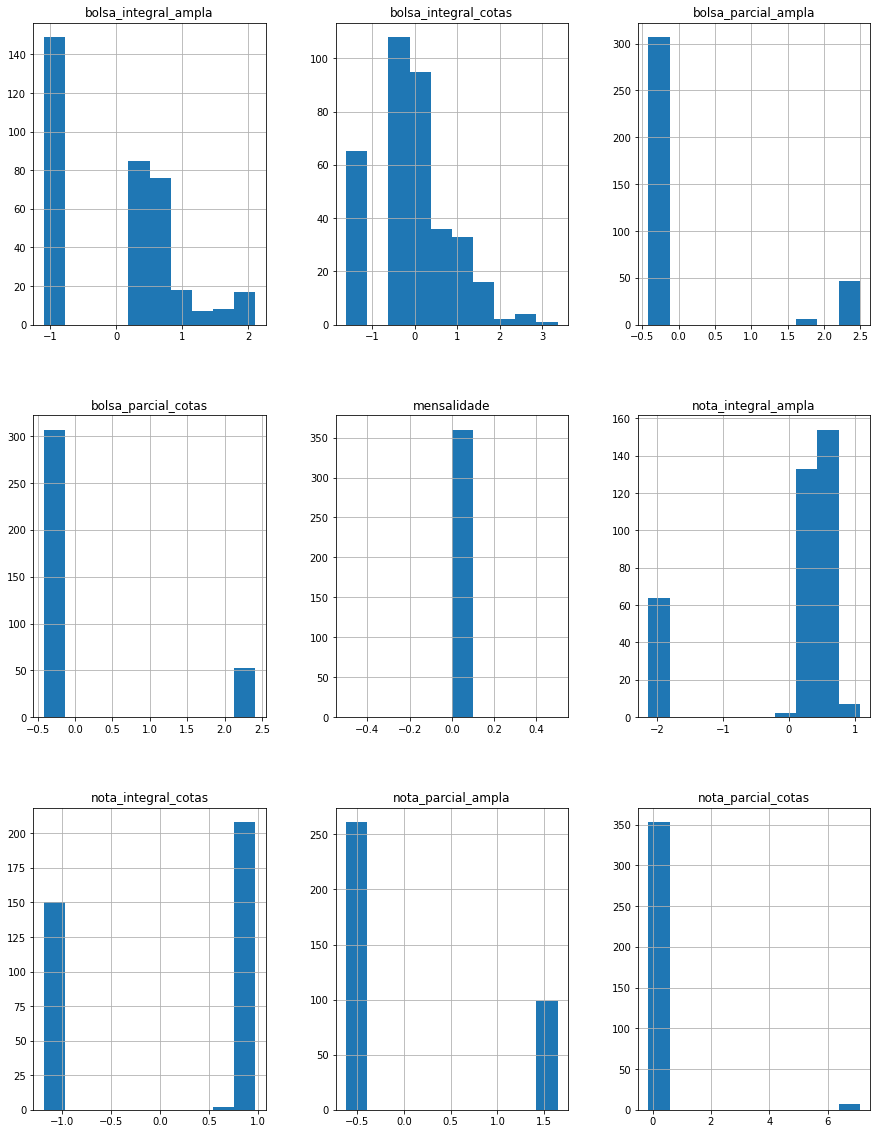

In [58]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
hist = df_norm.hist(bins=10, ax=ax)

In [0]:
#transformação por quartile
qt = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
qt = qt.fit(df_filtered.iloc[:,3:12])
df_norm.loc[:,3:12] = qt.transform(df_filtered.iloc[:,3:12])

In [0]:
#teste de normalidade por Shapiro Wilk
for i in df_filtered.columns:
  try:
    print(i)
    print(shapiro(df_filtered[i]))
  except ValueError:
    a=1

In [0]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
hist = df_norm.hist(bins=3, ax=ax)